# XGBoost의 개요
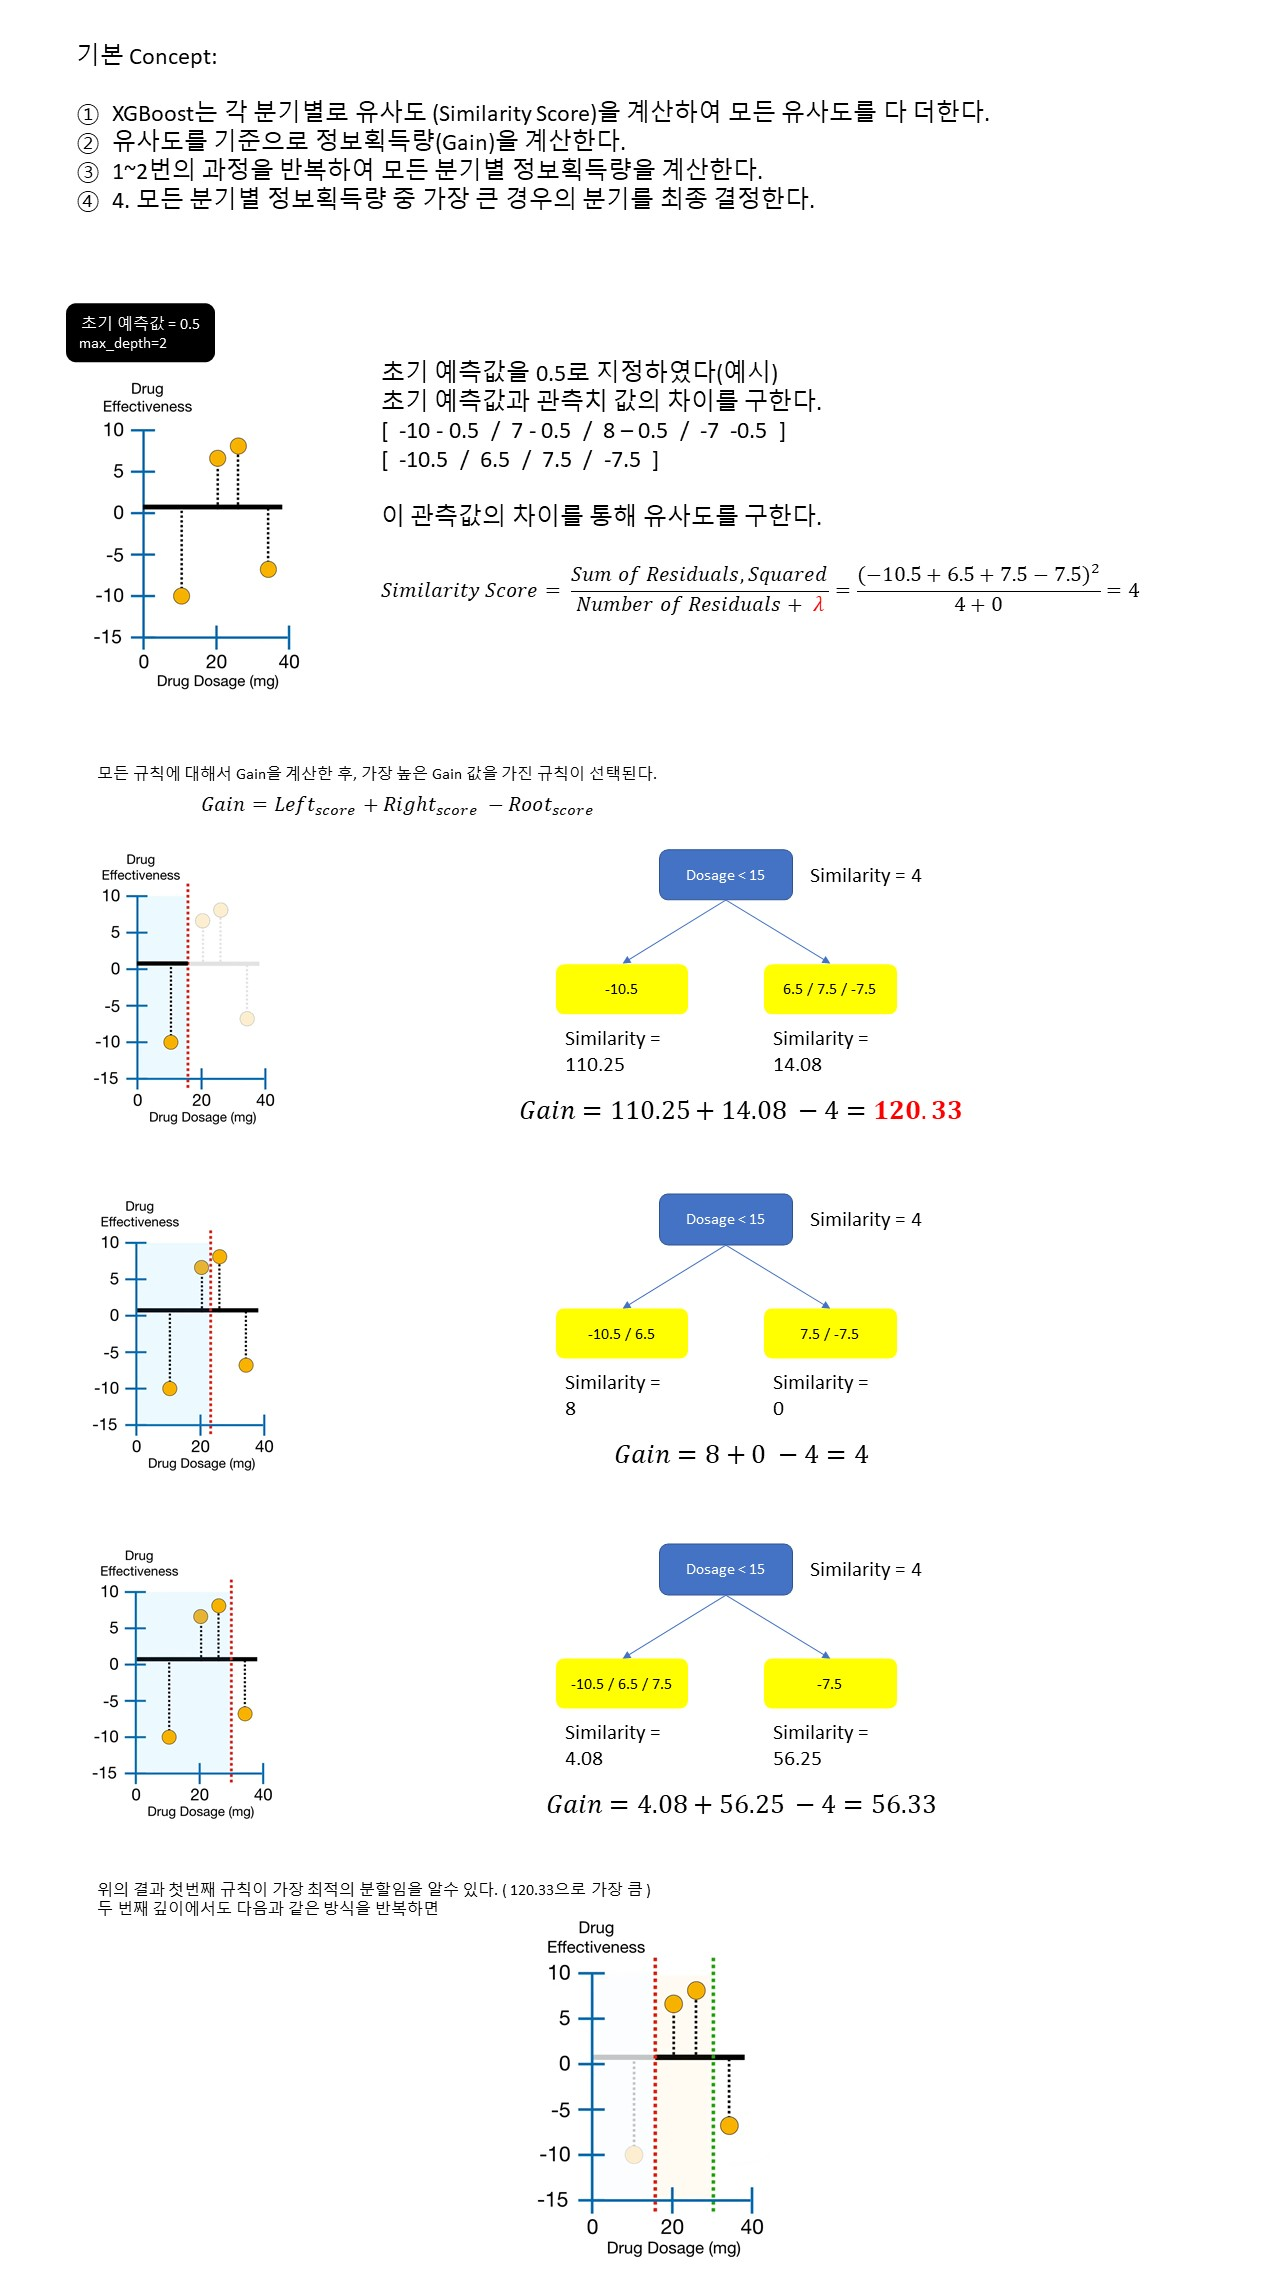
- GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결
- XGBoost는 병렬 학습이 가능해 GBM보다 빠르게 학습이 완료
- 과적합을 방지함
- 높은 성능을 지원함

In [21]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
XGB_clf = XGBClassifier(eval_metric='merror', use_label_encoder=False, seed=156)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.2, random_state=156)

In [22]:
XGB_clf.fit(X_train, y_train)
pred = XGB_clf.predict(X_test)
conf_mat = confusion_matrix(y_test, pred)

print(conf_mat)
accuracy_score(y_test, pred)

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]


1.0

<AxesSubplot:>

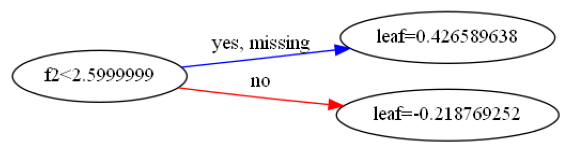

In [39]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(10, 12))
plot_tree(XGB_clf, ax=ax, rankdir='LR')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

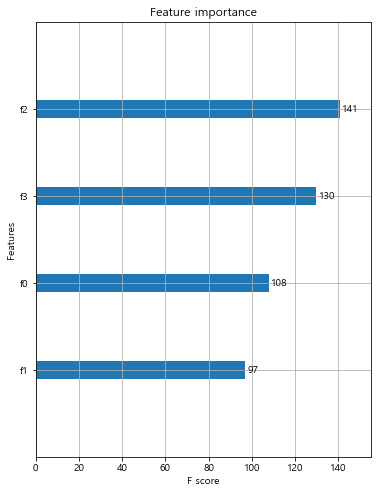

In [40]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(6, 8))
plot_importance(XGB_clf, ax=ax)

# XGBoost 하이퍼 파라미터

- Tree Booster를 사용하기 위해서는 세 가지 유형의 파라미터를 설정해야 함
    - General parameter: 일반적으로 실행 시 스레드의 개수나 Slient 모드 등의 선택을 위한 파라미터
    - Booster parameter: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭함
    - Learning task parameter: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

## General Parameters
- booster
    - 기본값: gbtree
    - 어떤 부스터를 쓸지 고른다. [gbtree, gblinear, dart] 중 하나
    
- verbosity
    - 기본값 : 1
    - 출력 메시지 레벨 [0 (silent), 1 (warning), 2 (info), 3 (debug)] 중 하나

- validate_parameters
    - 기본값 : false
    - 파라미터 유효성 검사 설정. 여러 파라미터들을 설정하다 보면 서로 모순되는 값들을 넣는 실수를 하는 실수를 방지해준다.

- nthread
    - 기본값 : 최대
    - 학습에 사용할 thread수.

- disable_default_eval_metric
    - 기본값 : 0
    - 0이면 기본 metric 사용, 아니면 기본 metric을 사용하지 않는다.
    - 커스텀 metric을 사용할 경우 설정한다.

- num_pbuffer
    - 기본값 : 자동으로 설정
    - 마지막 부스팅 단계의 예측 결과를 저장하는 버퍼의 크기
    - 자동으로 설정되기에 수정 필요 없음.
- num_feature
    - 기본값 : 인풋 피쳐의 수와 동일하게 설정됨
    - 부스팅에 사용되는 피쳐 수.
    - 자동으로 설정되기에 수정 필요 없음.

## Booster Parameters
- eta [alias: learning_rate]
    - 기본값 : 0.3 / 범위 : [0,1] 
    - 학습률. 낮은 값일수록 모델이 견고해지고 오버 피팅 방지에 좋다.
    - 일반적으로 0.01 ~ 0.3 정도로 설정한다. 제한된 리소스를 가진 기계에 모델을 올려야 할 경우 Step 수를 줄이기 위해 0.9까지 올려 모델 크기를 최소화할 수도 있지만 일반적인 상황이라면 권장하지 않는다.
    
- gamma [alias: min_split_loss]
    - 기본값 : 0 / 범위 : [0,∞]
    - gain 값이 gamma 이상일 경우 자식 노드를 생성하도록 한다.
    - Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있음.
    - lambda, alpha 값에도 영향을 받기 때문에, 파라미터 튜닝 시 세 가지를 동시에 바꿔가며 grid search를 하는 편

- max_depth
    - 기본값 : 6 / 범위 : [0,∞]
    - 최대 트리의 깊이. N이라고 가정하면 2^N개의 리프 노드가 생긴다. 10일 때 최대 1024개의 리프 노트가 생긴다.
    - 일반적으로 Feature 수에 따라 3~6으로 세팅한 후 성능이 증가하고, 오버 피팅이 나지 않을 때까지 늘려간다.
    - 제한된 리소스에 모델을 올려야 할 경우 울며 겨자 먹기로 약간의 성능을 포기하고 depth를 줄이기도 한다.

- subsample
    - 기본값 : 1 범위: (0,1]
    - 각각의 스탭마다 사용할 샘플의 비율. 1 이하의 값을 사용하면 오버 피팅을 방지할 수 있다.
    
> subsample은 data 자체를 샘플링하는 것이고 colsample_파라미터는 feature를 샘플링하는 것  
> colsample_파라미터는 feature가 너무 많거나 소수의 feature에 지나치게 의존적일 때 사용하는 것이 좋음

- sampling_method
    - 기본값 : uniform
    - subsample을 1 이하로 설정한다면 샘플을 뽑는지 정의한다.
    - [uniform, gradient_based] 중 하나
    
- colsample_bytree
    - 기본값 : 1 / 범위 : (0,1]
    - 각각의 트리(스탭)마다 사용할 칼럼(Feature)의 비율
    - 개인적으로 colsample_* 파라미터들 중에 가장 효과가 좋은 것 같음.

- colsample_bylevel
    - 기본값 : 1 / 범위 : (0,1]
    - 각각의 트리 depth 마다 사용할 칼럼(Feature)의 비율

- colsample_bynode
    - 기본값 : 1 / 범위 : (0,1]
    - 각각의 노드 depth 마다 사용할 칼럼(Feature)의 비율
    - colsample_bylevel와 비슷해 보이지만 이 경우 좌, 우 리프 노드가 서로 다른 feature를 사용하게 된다.

- lambda [alias: reg_lambda]
    - 기본값 : 1 / 범위 : [0,∞]
    - L2 정규화(규제) 파라미터이다.
    - 피처 개수가 많을 경우 적용을 검토
    - 커질수록 보수적인 모델을 생성하고 오버 피팅을 방지해준다. 지나치게 클 경우 언더 피팅이 난다. 
    - 너무 큰 가중치를 그 크기에 비례하여 줄여준다.
    - noise나 outlier 같은 애들이나 너무 크게 튀는 데이터들을 어느 정도 잡아준다고 보면 된다. 
    - gamma, alpha와 함께 튜닝함.

- alpha [alias: reg_alpha]
    - 기본값 : 0 / 범위: [0,∞]
    - L1 정규화(규제) 파라미터이다.
    - 피처 개수가 많을 경우 적용을 검토
    - 커질수록 보수적인 모델을 생성하고 오버 피팅을 방지해준다.
    - 불필요한 가중치를 0으로 만들어서 무시하도록 한다. 
    - sparse feature 가 있거나 feature수가 지나치게 많을 때 효과적이다.
    - gamma, lambda와 함께 튜닝함.

- scale_pos_weight [default=1]
    - 데이터 클래스(레이블) 불균형이 있을 때 레이블 가중치를 조절해주는 파라미터
    - 권장 값 : sum(negative instances) / sum(positive instances)
    - 굉장히 중요한 파라미터. 데이터 불균형이 심한 경우 꼭 설정해주는 게 좋다.
    

## Learning Task Parameters
- objective
    - 기본값 : reg:squarederror
    - 목적함수. 이 함수를 통해 나온 값이 최소화되는 방향으로 학습된다.
    - 종류가 너무 다양해 자주 쓰는 것들만 설명하자면
        - reg:squarederror / reg:squaredlogerror : 오차 제곱 / 오차 로그 제곱
        - binary:logistic : 이항 분류(binary class)에 사용. 이항 분류는 대부분 이놈만 쓴다.
        - multi:softmax / multi:softprob : 다항 분류(multi class)에 사용.
        - rank:pairwise / rank:ndcg / rank:map : l2r에 사용

- base_score
    - 기본값 : 0.5
    - 초기 편향치(bias)이다.
    - 범위가 0~1 사이가 아닌 값을 예측하는 경우 이 값을 그 중간 값으로 설정해주면 가끔 성능이 좋아지거나 빨리 종료되기도 한다.

- eval_metric
    - 기본값 : objective에 따라 다름.
    - 평가 지표이다. 각 스텝마다 완성된 모델을 이 지표를 통해서 평가한다.
    - 이것도 너무 많으므로 자주 쓴 것들만 설명.
        - rmse / rmsle : 글자 그대로 역순으로 해석하면 된다. 에러 (로그) 제곱 평균의 루트 값
        - mae : 오차 절댓값 평균
        - error / error@t : 이항 분류(binary class)에서 error는 0.5 이상을 1 미만을 0이라고 판단하고 error@t는 t 이상을 1 미만을 0이라고 판단한다.
        - merror : error의 다항 분류(multi class) 버전
        - auc : auc는 area under curve의 약자로 즉 곡선 아래의 면적 이란 뜻이다. 보통 auc라고 하면 roc auc을 뜻한다. FPR과 TPR에 민감한 데이터 셋 일 경우 사용한다.
        - aucpr : auc뒤에 붙은 pr은 preicison recall을 뜻한다. f-score나 precision, recall에 민감할 때 사용한다.(error나 rmse가 더 잘 나오는 경우도 많으니 다 해봐야 함.)

- seed
    - 기본값 : 0
    - 랜덤 시드이다. 같은 데이터 셋으로 여러 모델을 비교할 때는 같은 값으로 설정하고 비교해야 한다.

## etc
- num_boost_round
    - 기본값 : 의무 설정 / 범위: [0,∞]
    - 몇 회의 step을 반복할지 지정한다. 너무 높은 값을 사용하면 오버 피팅이 생기고 모델의 사이즈가 커진다.

- early_stopping_rounds
    - 기본값 : 설정하지 않을 경우 비활성화. / 범위: [0,∞]
    - 조기 종료 조건이다.
    - eval_metric이 결과가 early_stopping_rounds 횟수 동안 개선되지 않으면 num_boost_round에 도달하기 전에 종료한다.
    

- 민감하게 조정해야하는 것
    - booster 모양
    - eval_metric(평가함수) / objective(목적함수)
    - eta 
    - L1 form (L1 레귤러라이제이션 폼이 L2보다 아웃라이어에 민감하다.)
    - L2 form

- 과적합 방지를 위해 조정해야하는 것
    - learning rate 낮추기 → n_estimators은 높여야함
    - max_depth 낮추기
    - min_child_weight 높이기
    - gamma 높이기
    - subsample, colsample_bytree 낮추기

In [14]:
def visualize_boundary(estimator, X, y, columns, title=None):
    
    estimator.fit(X, y)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.scatter(X[:,0], X[:,1], c=y, cmap='rainbow', edgecolor='k', s=20, zorder=3)
    ax.axis('tight')
    
    x_lim_start, x_lim_end = ax.get_xlim()
    y_lim_start, y_lim_end = ax.get_ylim()
    
    xx, yy = np.meshgrid( np.arange(x_lim_start, x_lim_end, 0.02),
                          np.arange(y_lim_start, y_lim_end, 0.02))
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.5, 
                levels = np.arange(len(np.unique(y))+1)-0.5,
                cmap='rainbow');
    
    plt.xlabel(iris.feature_names[columns[0]], fontsize=16)
    plt.ylabel(iris.feature_names[columns[1]], fontsize=16)
    
    if title==None:
        pass
    else:
        plt.title(str(title), fontsize=16)

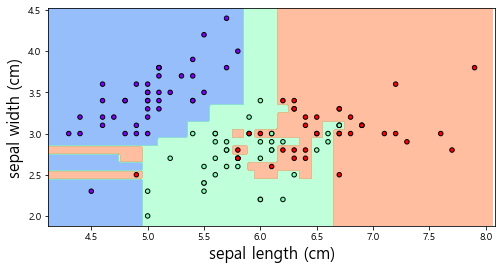

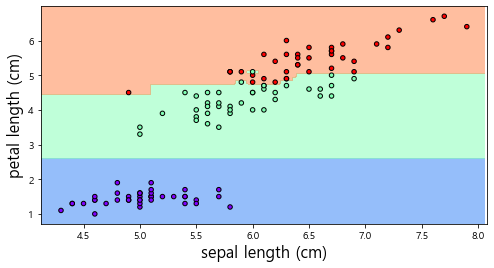

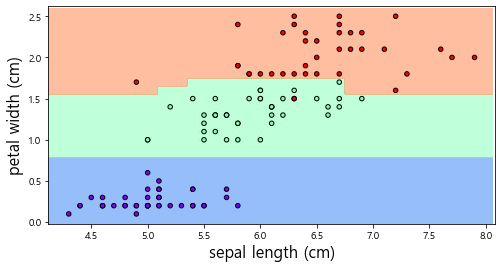

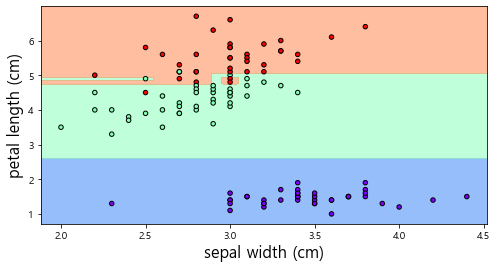

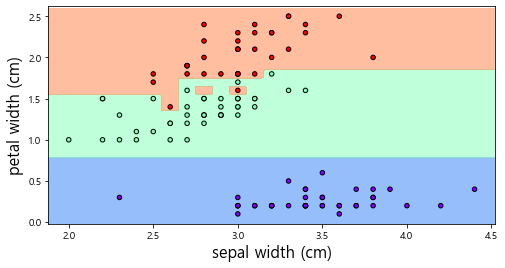

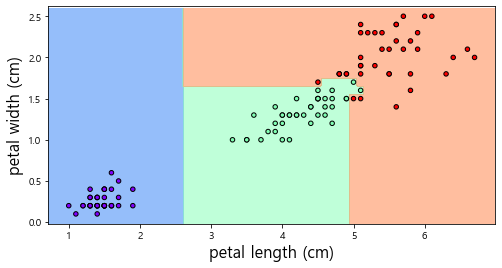

In [41]:
for i in  [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]:
    visualize_boundary(XGB_clf, X_train[:,i], y_train, i)

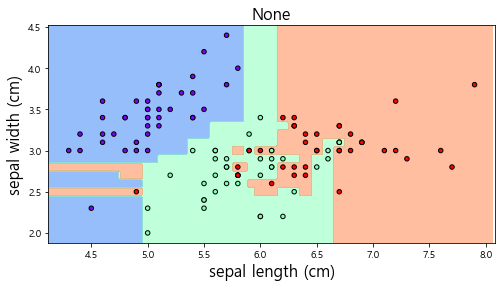

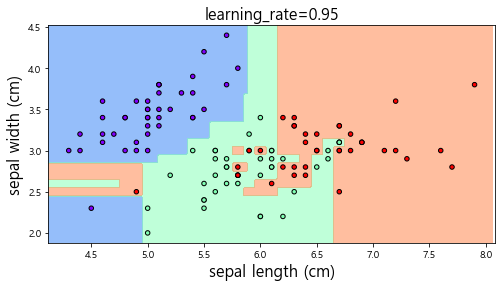

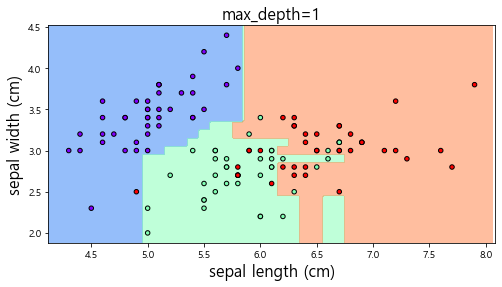

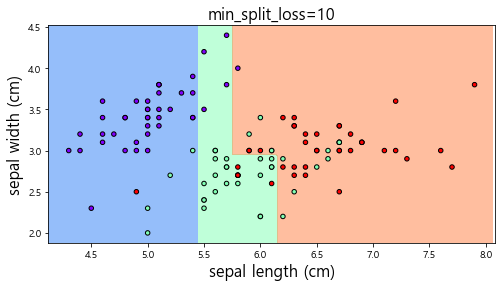

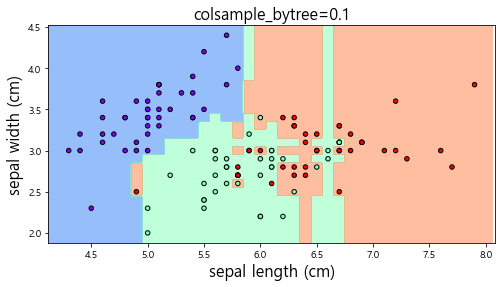

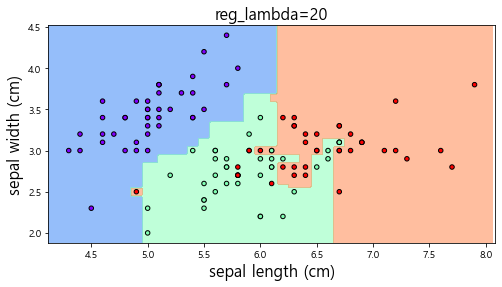

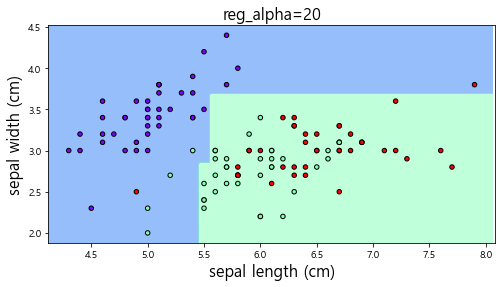

In [67]:
XGB_clf = XGBClassifier(eval_metric='merror', use_label_encoder=False, seed=156)
visualize_boundary(XGB_clf, X_train[:,[0,1]], y_train, [0,1], title='None')

# 학습률 조절, 이 수치가 크면 클수록 과소적합의 위험성이 존재하며 작으면 과대적합의 가능성이 존재한다.
XGB_clf = XGBClassifier(learning_rate=0.95, eval_metric='merror', use_label_encoder=False, seed=156)
visualize_boundary(XGB_clf, X_train[:,[0,1]], y_train, [0,1], title='learning_rate=0.95')

# 최대 깊이를 조절
XGB_clf = XGBClassifier(max_depth=1, eval_metric='merror', use_label_encoder=False, seed=156)
visualize_boundary(XGB_clf, X_train[:,[0,1]], y_train, [0,1], title='max_depth=1')

# 정보획득값이 gamma값 이상일 경우 자식노드를 생성하게 함 이때의 gamma값을 조정, 과대적합 조정에 좋으나 너무 많을 경우 과소적합이 생길수 있다.
XGB_clf = XGBClassifier(min_split_loss=10, eval_metric='merror', use_label_encoder=False, seed=156)
visualize_boundary(XGB_clf, X_train[:,[0,1]], y_train, [0,1], title='min_split_loss=10')

# 각각의 트리마다 사용할 컬럼(Feature)의 비율
XGB_clf = XGBClassifier(colsample_bytree=0.1, eval_metric='merror', use_label_encoder=False, seed=156)
visualize_boundary(XGB_clf, X_train[:,[0,1]], y_train, [0,1], title='colsample_bytree=0.1')

# L1 정규화 파라미터 조정
XGB_clf = XGBClassifier(reg_lambda=20, eval_metric='merror', use_label_encoder=False, seed=156)
visualize_boundary(XGB_clf, X_train[:,[0,1]], y_train, [0,1], title='reg_lambda=20')

# L2 정규화 파라미터 조정
XGB_clf = XGBClassifier(reg_alpha=20, eval_metric='merror', use_label_encoder=False, seed=156)
visualize_boundary(XGB_clf, X_train[:,[0,1]], y_train, [0,1], title='reg_alpha=20')

# XGBoost 하이퍼 파라미터 튜닝

In [68]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_split_loss':[0, 1, 2, 5, 10],
    'reg_lambda':[0.1, 0.5, 1, 1.5, 2],
    'reg_alpha':[1, 2, 3, 5, 7, 10]
}

XGB_clf = XGBClassifier(eval_metric='merror', use_label_encoder=False, seed=156)
grid_cv = GridSearchCV(XGB_clf, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'min_split_loss': 0, 'reg_alpha': 1, 'reg_lambda': 0.1}
최고 예측 정확도: 0.9583


In [69]:
param_df = pd.DataFrame(grid_cv.cv_results_).sort_values(by='mean_test_score', ascending=False)
param_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_split_loss,param_reg_alpha,param_reg_lambda,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.267359,0.206330,0.003401,3.323304e-03,0,1,0.1,"{'min_split_loss': 0, 'reg_alpha': 1, 'reg_lam...",0.916667,0.958333,0.958333,1.0,0.958333,0.958333,0.026352,1
11,0.170839,0.024026,0.001200,4.003290e-04,0,3,0.5,"{'min_split_loss': 0, 'reg_alpha': 3, 'reg_lam...",0.916667,0.916667,0.958333,1.0,0.958333,0.950000,0.031180,2
33,0.258081,0.024097,0.001200,3.998996e-04,1,1,1.5,"{'min_split_loss': 1, 'reg_alpha': 1, 'reg_lam...",0.916667,0.916667,0.958333,1.0,0.958333,0.950000,0.031180,2
32,0.273670,0.018268,0.001600,4.900977e-04,1,1,1,"{'min_split_loss': 1, 'reg_alpha': 1, 'reg_lam...",0.916667,0.916667,0.958333,1.0,0.958333,0.950000,0.031180,2
31,0.244655,0.020968,0.001001,5.840039e-07,1,1,0.5,"{'min_split_loss': 1, 'reg_alpha': 1, 'reg_lam...",0.916667,0.916667,0.958333,1.0,0.958333,0.950000,0.031180,2


출처:  
파이썬 머신러닝 완벽 가이드  
[statquest](https://www.youtube.com/watch?v=OtD8wVaFm6E&ab_channel=StatQuestwithJoshStarmer)  
[밥먹는 개발자 블로그](https://dining-developer.tistory.com/4?category=929228)  
[우노 블로그](https://wooono.tistory.com/97)  
[분석벌레의 공부방 블로그](https://analysisbugs.tistory.com/226?category=840322)